# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [1]:
import os
from utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm
import torch

Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [2]:
CSV_PATH = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\query_final_results_20231026023937.csv'

Carga el Dataset.

In [3]:
#print("Counting length of csv file")
#with open(CSV_PATH, 'r', encoding='utf-8') as file:
#    total_lines = sum(1 for _ in file)
#print(f"{total_lines} rows will be loaded to create the recommendation system")


In [4]:
total_lines = 100000
# Create an empty list to store the DataFrames from chunks
dfs = [] 
# Create a tqdm wrapper for pd.read_csv
with tqdm(total=total_lines, desc = 'Loading Dataset') as pbar:
    def update_progress(n):
        pbar.update(n)
    
    # Read the CSV file using pd.read_csv and provide the progress callback
    df_chunks = pd.read_csv(CSV_PATH, chunksize=100000, iterator=True, encoding='utf-8', nrows=total_lines)  # Specify the encoding
    for chunk in df_chunks:
        # Process each chunk if needed
        # You can access the chunk data in the 'chunk' DataFrame
        #chunk['first_two_digits_code'] = chunk['agilebuyingscode'].apply(lambda x: x[:2])
        chunk['feature_vector'] = chunk['agilebuyingscode'].apply(lambda x: x[:2]) + ' ' + chunk['agileoffereditemsdescripcionofertada']
        chunk['feature_vector'] = chunk['feature_vector'].apply(lambda x: unidecode(str(x)).lower())
        dfs.append(chunk)
        update_progress(chunk.shape[0])
        
df = pd.concat(dfs, ignore_index=True)

Loading Dataset: 100%|██████████| 100000/100000 [00:01<00:00, 63707.14it/s]


Lanzar el recomendador. Si no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
['count_vectorizer_model.pkl', 'dev_uservectorgen.ipynb', 'ExperimentalDash.py', 'kmeans_clusters.csv', 'kmeans_model.pkl', 'LaunchRS.py', 'ShowcaseSystem.ipynb', 'utils', 'vectorized_corpus.csv']
Models and Dataframes not found, initializing a Recommender System from zero.
Se han removido 92.0% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 121.


Selecting strings from each user:   0%|          | 0/121 [00:00<?, ?it/s]

Selecting strings from each user: 100%|██████████| 121/121 [00:00<00:00, 372.80it/s]
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[[-0.30833346  0.03732863 -0.2706583  ...  0.10863999  0.10107281
   0.27720624]
 [-0.2481728   0.04562805 -0.3421883  ...  0.06639358  0.02118061
   0.43211073]
 [-0.14837849  0.03424364 -0.286741   ...  0.18455684 -0.00732243
   0.3862664 ]
 ...
 [ 0.11715453  0.03772793 -0.3246996  ...  0.08921137  0.15832146
   0.41042066]
 [-0.00648268  0.05105185 -0.28426605 ...  0.16389732  0.03994101
   0.37952486]
 [ 0.00396506 -0.04547488 -0.26913157 ...  0.11305588 -0.03459944
   0.36421406]]
(121, 768)


c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


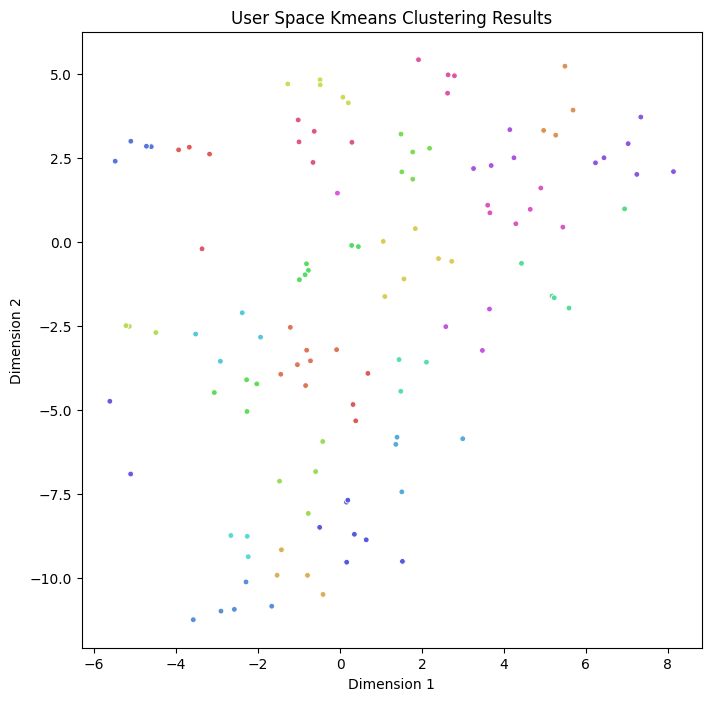

Exporting Kmeans model
Exporting Kmeans clusters
Exporting vectorizer model
Done
Exporting vectorized corpus


In [5]:
RS = RecommenderSystem(df,save_path=  os.getcwd())

### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [6]:
 
n_cluster,gg = RS.predict('77.187.331-6') 


(121, 768) (768,)
Unseen data point belongs to cluster 29


Agregando un poco de post-procesamiento se pueden encontrar visualizaciones de interés.

In [7]:
gg.query(f"Cluster == {n_cluster}")

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,feature_vector_x,feature_vector_y,Cluster
180,61.004.087-K,1968-203-COT23,"""AL MOMENTO DE ENVIAR COTIZACIÓN A TRAVÉS DE L...",OC Emitida,$,500000.0,Bolsas de basura,47121701,Equipos y suministros de limpieza / Equipo de ...,Bolsas de basura,Equipos y suministros de limpieza / Equipo de ...,Contacto: Iván Arevalo\nTeléfono: 950434250iar...,52500.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,19 contacto: ivan arevalo\ntelefono: 950434250...,19 contacto: ivan arevalo telefono: 950434250i...,29.0
181,61.004.087-K,1968-203-COT23,"""AL MOMENTO DE ENVIAR COTIZACIÓN A TRAVÉS DE L...",OC Emitida,$,500000.0,Bolsas de basura,47121701,Equipos y suministros de limpieza / Equipo de ...,Bolsas de basura,Equipos y suministros de limpieza / Equipo de ...,Contacto: Iván Arevalo\nTeléfono: 950434250iar...,52500.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,19 contacto: ivan arevalo\ntelefono: 950434250...,19 contacto: ivan arevalo telefono: 950434250i...,29.0
182,61.004.087-K,1968-203-COT23,"""AL MOMENTO DE ENVIAR COTIZACIÓN A TRAVÉS DE L...",OC Emitida,$,500000.0,Bolsas de basura,47121701,Equipos y suministros de limpieza / Equipo de ...,Bolsas de basura,Equipos y suministros de limpieza / Equipo de ...,Contacto: Iván Arevalo\nTeléfono: 950434250iar...,52500.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,19 contacto: ivan arevalo\ntelefono: 950434250...,19 contacto: ivan arevalo telefono: 950434250i...,29.0
183,61.004.087-K,1968-203-COT23,"""AL MOMENTO DE ENVIAR COTIZACIÓN A TRAVÉS DE L...",OC Emitida,$,500000.0,Bolsas de basura,47121701,Equipos y suministros de limpieza / Equipo de ...,Bolsas de basura,Equipos y suministros de limpieza / Equipo de ...,Contacto: Iván Arevalo\nTeléfono: 950434250iar...,52500.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,19 contacto: ivan arevalo\ntelefono: 950434250...,19 contacto: ivan arevalo telefono: 950434250i...,29.0
184,61.004.087-K,1968-203-COT23,"""AL MOMENTO DE ENVIAR COTIZACIÓN A TRAVÉS DE L...",OC Emitida,$,500000.0,Bolsas de basura,47121701,Equipos y suministros de limpieza / Equipo de ...,Bolsas de basura,Equipos y suministros de limpieza / Equipo de ...,Contacto: Iván Arevalo\nTeléfono: 950434250iar...,52500.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,19 contacto: ivan arevalo\ntelefono: 950434250...,19 contacto: ivan arevalo telefono: 950434250i...,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99483,61.313.000-4,1039-114-COT23,SAE 106 MATERIALES ASEO MNEM,OC Emitida,$,100000.0,Limpiadores de suelo,47121605,Equipos y suministros de limpieza / Equipo de ...,Limpiadores de suelo,Máquinas y accesorios para suelos,LIMPIADOR DE PISOS 4 LTS.,13245.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,10 limpiador de pisos 4 lts.,19 contacto: ivan arevalo telefono: 950434250i...,29.0
99484,61.313.000-4,1039-114-COT23,SAE 106 MATERIALES ASEO MNEM,OC Emitida,$,100000.0,Limpiadores de suelo,47121605,Equipos y suministros de limpieza / Equipo de ...,Limpiadores de suelo,Máquinas y accesorios para suelos,LIMPIADOR DE PISOS 4 LTS.,13245.0,77.765.630-9,REPARACION DE OTROS EQUIPOS ELECTRONICOS Y OPT...,False,10 limpiador de pisos 4 lts.,19 contacto: ivan arevalo telefono: 950434250i...,29.0
99485,61.313.000-4,1039-114-COT23,SAE 106 MATERIALES ASEO MNEM,OC Emitida,$,100000.0,Limpiadores de suelo,47121605,Equipos y suministros de limpieza / Equipo de ...,Limpiadores de suelo,Máquinas y accesorios para suelos,LIMPIADOR DE PISOS 4 LTS.,13245.0,77.765.630-9,REPARACION DE OTRO

In [8]:
display(gg.query(f"Cluster == {n_cluster}").groupby(by =['taxnumberprovider','agilebuyingscode','agilebuyingsdescription','agileitemsproductcategory']).count())

organismosolicitante  \
taxnumberprovider agilebuyingscode   agilebuyingsdescription                            agileitemsproductcategory                                                  
77.354.084-5      1002772-929-COT23  SONDA FOLEY 18 FR CON BALON 75 ML 3 VIAS SILICO... Equipamiento y suministros médicos / Productos ...                    16   
                  1003473-1110-COT23 MASCARILLA P/OXIG.C/DOSIF.ADULTO MULTI-VENT (FA... Equipamiento y suministros médicos / Productos ...                    16   
                  1057473-87-COT23   500 Manta térmica de aluminio para retener el c... Muebles, accesorios, electrodomésticos y produc...                    16   
                  1057501-2300-COT23 PROGRAMACION INSUMOS HASTA MARZO 2023. FAVOR AD... Equipamiento y suministros médicos / Productos ...                    16   
                  1232672-22-COT23   MATERIALES PARA TALLER DE ESTIMULACIÓN COGNITIV... Equipamiento y suministros médicos / Productos ...                    16   
...                                                                                                                                                          ...   
86.821.000-1      5338-54-COT23      La Universidad de Magallanes, requiere la adqui... Equipamiento y suministros médicos / Vestuario ...                    16   
                  608-2072-COT23     SONDA NELATON 12FR SILICONA ESTERIL\n\nAdjuntar... Bougies quirúrgicos, sondas, obturadores y prod...                    16   
                  617807-1076-COT23  ADQUISICION SABANILLAS CLINICAS                    Equipamiento y suministros médicos / Vestuario ...                    16   
                  937232-114-COT23   SOLICITAMOS APOSITOS GASA-ALGODON, LIBRE DE PAR... Equipamiento y suministros médicos / Productos ...                    16   
                  949-14-COT23       SECREDUC Atacama requiere comprar , toalla de p... Equipos y suministros de limpieza / Suministros...                    16   

                                                                                                                                            agilebuyingsstatus  \
taxnumberprovider agilebuyingscode   agilebuyingsdescription                            agileitemsproductcategory                                                
77.354.084-5      1002772-929-COT23  SONDA FOLEY 18 FR CON BALON 75 ML 3 VIAS SILICO... Equipamiento y suministros médicos / Productos ...                  16   
                  1003473-1110-COT23 MASCARILLA P/OXIG.C/DOSIF.ADULTO MULTI-VENT (FA... Equipamiento y suministros médicos / Productos ...                  16   
                  1057473-87-COT23   500 Manta térmica de aluminio para retener el c... Muebles, accesorios, electrodomésticos y produc...                  16   
                  1057501-2300-COT23 PROGRAMACION INSUMOS HASTA MARZO 2023. FAVOR AD... Equipamiento y suministros médicos / Productos ...                  16   
                  1232672-22-COT23   MATERIALES PARA TALLER DE ESTIMULACIÓN COGNITIV... Equipamiento y suministros médicos / Productos ...                  16   
...                                                                                                                                                        ...   
86.821.000-1      5338-54-COT23      La Universidad de Magallanes, requiere la adqui... Equipamiento y suministros médicos / Vestuario ...                  16   
                  608-2072-COT23     SONDA NELATON 12FR SILICONA ESTERIL\n\nAdjuntar... Bougies quirúrgicos, sondas, obturadores y prod...                  16   
                  617807-1076-COT23  ADQUISICION SABANILLAS CLINICAS                    Equipamiento y suministros médicos / Vestuario ...                  16   
                  937232-114-COT23   SOLICITAMOS APOSITOS GASA-ALGODON, LIBRE DE PAR... Equipamiento y suministros médicos / Productos ...                  16   
                  949-14-COT23       SECREDUC Atacama requiere 